# Survival Analysis in Python using lifelines package

## Introduction

In this tutorial, we will learn a data analysis method called **Survival Analysis**. Survival analysis, also known as Time to Event Analysis is a branch of statistics for analyzing the expected duration of time until one or more events happen, such as death in biological organisms and failure in mechanical systems. Survival analysis is widely used in variety of fields including medicine, engineering, economics, and sociology. The main goals of the survival analysis include estimating the proportion of a population that will survive past a certain time, and among the ones that survive, the rate they will die or fall, and investigating the factors that affect the probability of survival.

## Tutorial content

In this tutorial, we will show how to do some basic survival analysis in Python, specifically using [`lifelines`](https://lifelines.readthedocs.io/en/latest/) package.

We will be using Teleco Customer Churn data from Kaggle : https://www.kaggle.com/blastchar/telco-customer-churn

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

We will cover the following topics in this tutorial:

- Survival Time and Event
- Censoring
- Hazard Ratio
- Installing the libraries
- Kaplan Meier Curve
    - Short Example
    - Churn Example
- Cox Proportional Hazard Model (Survival Regression)

## Survival Time and Event

In order to achieve these goals, we need to define our variable **"Survival time"**(also known as "lifetime") and **event**. **Survival time** means timespan from a specified index date in a time series to the time of the observed **event**. We could define our **event** as we want. Traditionally only a single event occurs for each subject. In the case of medical study, it could be death, diagnosis of disease or incidence of side effect due to studied drug. However, sometimes it can be more ambiguous to define an event in other study fields. For example, for mechanical reliability, failure may not be well-defined, since there may be mechanical systems in which failure is partial, a matter of degree, or not otherwise localized in time.

## Censoring

Another issue that frequently pops up in survival analysis is that oftentimes data needs **censoring**. For example, if we conduct a clinical study of survival time of cancer patients, a patient who experienced death before the study ends doesn't require censoring because we know his/her exact survival time, which is the time until death. However, we don't know the exact survival time of the patient who survived pass the end of the follow-up time. We only know that they survived up to at least the end of the study. In this case, right-censoring occurs. In right censoring, the true survival times will always be equal to or greater than the observed survival time. The data we obtain after censoring is called **Censored Data**.
   
There are three main types of censoring - **(1) Type 1 Censoring, (2) Type 2 Censoring, Random Censoring**. **Type 1 Censoring** occurs if an experiment has a set number of subjects and stops the experiment at a predetermined time, at which point any subjects remaining are right-censored. **Type 2 Censoring** occurs if an experiment has a set number of subjects and stops the experiment when a predetermined number are observed to have failed. The remaining subjects are right-censored. **Random Censoring** occurs when each subject has a censoring time that is statistically independent of their failure time. It could be the uncontrollable cases such as end of tracking due to change of residence of a patient. The observed value is the minimum of the censoring and failure times; subjects whose failure time is greater than their censoring time are right-censored.

## Hazard Ratio

In survival analysis, the **hazard ratio** is the ratio of the hazard rates corresponding to the conditions described by two levels of an explanatory variable. For example, in a drug study, the treated population may die at twice the rate per unit time of the control population. The hazard ratio would be 2, indicating higher hazard of death from the treatment.

A **hazard ratio** of 1 means lack of association, a hazard ratio greater than 1 suggests an increased risk, and a hazard ratio below 1 suggests a smaller risk.

The resolution of these endpoints are usually depicted using **Kaplan–Meier survival curves**. 
   
**Kaplan-Meier estimator** is the classic method for measuring survival function, also known as **Product-limit estimator**. The estimator of the survival function $S(t)$ (the probability that life is longer than t) is given by:
   
   $$\hat{S}(t) = \prod_{i: t_i \leq t} (1 - \frac{d_i}{n_i}) ,$$   
with $t_i$ a  time when at least one event happened, $d_i$ the *number of events* (e.g., deaths) that happened at time $t_i$, and $n_i$ the *individuals known to have survived* (have not yet had an event or been censored) up to time $t_i$.

These curves relate the proportion of each group where the endpoint has not been reached. The curve represents the odds of an endpoint having occurred at each point in time (the hazard). The **hazard ratio** is the relationship between the instantaneous hazards in the two groups and represents the magnitude of distance between the Kaplan–Meier plots.

A plot of the Kaplan-Meier estimator is a series of declining horizontal steps which, with a large enough sample size, approaches the true survival function for that population. The value of the survival function between successive distinct sampled observations ("clicks") is assumed to be constant. An important advantage of the Kaplan-Meier curve is that the method can vtake into account some types of **censored data**, particularly right-censoring. On the plot, small vertical tick-marks state individual patients whose survival times have been right-censored. To generate a Kaplan-Meier estimator, two pieces of data are required for each subject: the status at the event (or right-censored), and the survival time.

Let $\tau \geq 0$ be a random variable, which we think of as the survival time until an event takes place. The goal is to estimate the survival function $S$ underlying $\tau$. 

$S(t) = $ Prob $(\tau > t)$, where $t = 0,1,...$ is the time. The challenge is to estimate $S(t)$.

In this tutorial, we will practice Survival Analysis using Churn data. We will use **lifelines** package to conduct survival analysis.

## Installing the Libraries

In [1]:
#!pip install lifelines
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from lifelines.plotting import plot_lifetimes
%pylab inline
figsize(12,6)

Populating the interactive namespace from numpy and matplotlib


## Kaplan Meier Curve
### Short Example

<AxesSubplot:xlabel='timeline'>

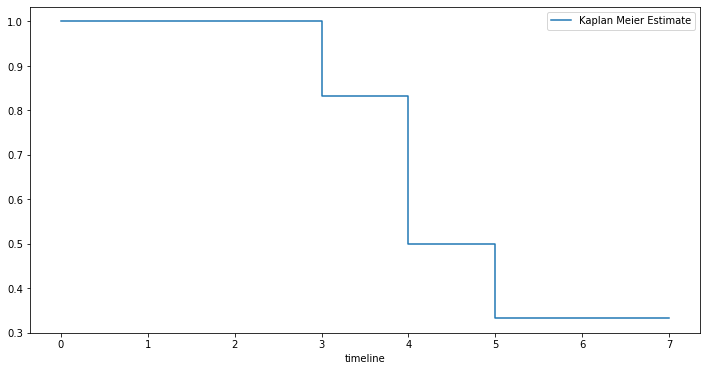

In [2]:
from lifelines import KaplanMeierFitter

## Sample Data
survivaltime = [5, 7, 6, 3, 4, 4]
event = [1, 0, 0, 1, 1, 1]

## Create kmf object
kmf = KaplanMeierFitter()

## Fit the data into the model
kmf.fit(survivaltime, event, label = "Kaplan Meier Estimate")

## Create an estimate
kmf.plot(ci_show = False) ## ci_show is meant for Confidence interval, didn't show here because this is a small sample

### Churn Example

Download dataset from https://www.kaggle.com/blastchar/telco-customer-churn

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

Take a look at the dataset.

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In order to conduct survival analysis, replace **'Yes'** and **'No'** in the **Churn** column to **'1'** and **'0'**. 1 for the event and 0 for the censured data.

In [6]:
df['Churn']=df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0 )

In [7]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


First, lets go ahead and plot Kaplan Meier Curve on the entire set of rows.

<AxesSubplot:xlabel='timeline'>

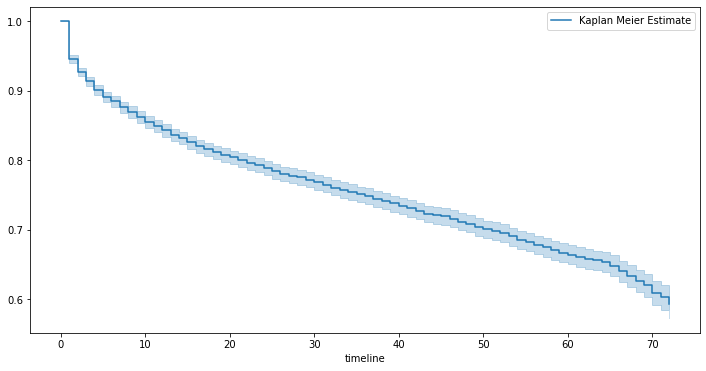

In [8]:
from lifelines import KaplanMeierFitter

survivaltime = df['tenure']
event = df['Churn']

## create a kmf object as km
kaplan = KaplanMeierFitter() ## instantiate the class to create an object

## Fit the data into the model
kaplan.fit(survivaltime, event, label = "Kaplan Meier Estimate")

## Create an estimate
kaplan.plot()

Next, we divide the dataset into two cohort groups by **gender** variable and compare the **Kaplan Meier Curves** of each cohort group. We see that the **Churn** rate between these two groups are very similar.

<AxesSubplot:xlabel='timeline'>

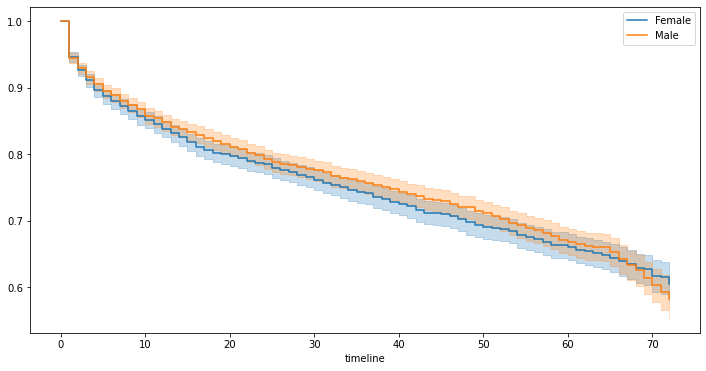

In [9]:
kmf = KaplanMeierFitter()

survivaltime = df['tenure']
event = df['Churn']

female = (df['gender'] == 'Female')    ## Female
male = (df['gender'] == 'Male')          ## Male

## fit the model for 1st cohort
kmf.fit(survivaltime[female], event[female], label = 'Female')
a1 = kmf.plot()

## fit the model for 2nd cohort
kmf.fit(survivaltime[male], event[male], label = 'Male')
kmf.plot(ax = a1)

We try again by dividing the dataset into two cohort groups by **SeniorCitizen** variable and compare the **Kaplan Meier Curves** of each cohort group. We see that the **Churn** rate between these two groups differ. It is more likely to churn at an earlier period of time for senior citizens.

<AxesSubplot:xlabel='timeline'>

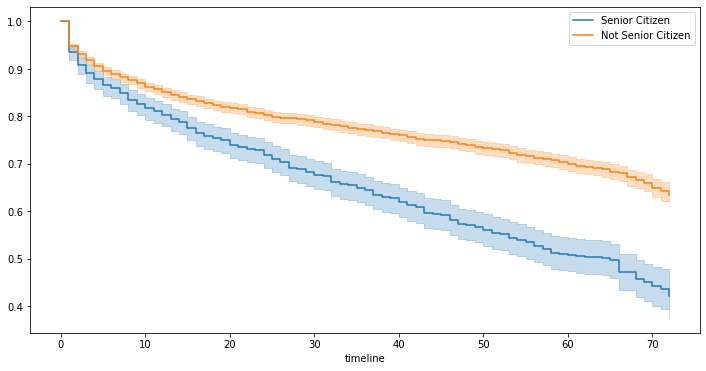

In [10]:
kmf1 = KaplanMeierFitter() ## instantiate the class to create an object

## Two Cohorts are compared. 1. Senior Citizen, 2. Not Senior Citizen
groups = df['SeniorCitizen']
s1 = (groups == 1)       ## group i1
s2 = (groups == 0)      ## group i2


## fit the model for 1st cohort
kmf1.fit(survivaltime[s1], event[s1], label = 'Senior Citizen')
a1 = kmf1.plot()

## fit the model for 2nd cohort
kmf1.fit(survivaltime[s2], event[s2], label = 'Not Senior Citizen')
kmf1.plot(ax = a1)

## Cox Proportional Hazard Model (Survival Regression)

Now, we will look at Cox Proportional Hazard Model by plotting **Forest plot**. We will only use subset of the columns present in the original data.

In [11]:
from lifelines import CoxPHFitter

## Only using the subset of the columns present in the original data
df_s = df.loc[:, ['tenure', 'Churn', 'gender', 'Partner', 'Dependents', 'InternetService', 'PaperlessBilling', 'SeniorCitizen', 
                  'PaymentMethod']]
df_s.head()

,tenure,Churn,gender,Partner,Dependents,InternetService,PaperlessBilling,SeniorCitizen,PaymentMethod
0,1,0,Female,Yes,No,DSL,Yes,0,Electronic check
1,34,0,Male,No,No,DSL,No,0,Mailed check
2,2,1,Male,No,No,DSL,Yes,0,Mailed check
3,45,0,Male,No,No,DSL,No,0,Bank transfer (automatic)
4,2,1,Female,No,No,Fiber optic,Yes,0,Electronic check


We create dummy variables.

In [12]:
## Create dummy variables
df_dummy = pd.get_dummies(df_s, drop_first = True)
df_dummy.head()

,tenure,Churn,SeniorCitizen,gender_Male,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,0,1,0,0,0,1,0,1,0
1,34,0,0,1,0,0,0,0,0,0,0,1
2,2,1,0,1,0,0,0,0,1,0,0,1
3,45,0,0,1,0,0,0,0,0,0,0,0
4,2,1,0,0,0,0,1,0,1,0,1,0


In [13]:
# Using Cox Proportional Hazards model
cph = CoxPHFitter()    ## Instantiate the class to create a cph object
cph.fit(df_dummy, 'tenure', event_col = 'Churn')    ## Fit the data to train the model

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>

**Forest plot** below provides **log hazard ratio** and **95% confidence interval** for each variables. In order to find **hazard ratio**, we need to take exponent of the **log(HR)**.

<AxesSubplot:xlabel='log(HR) (95% CI)'>

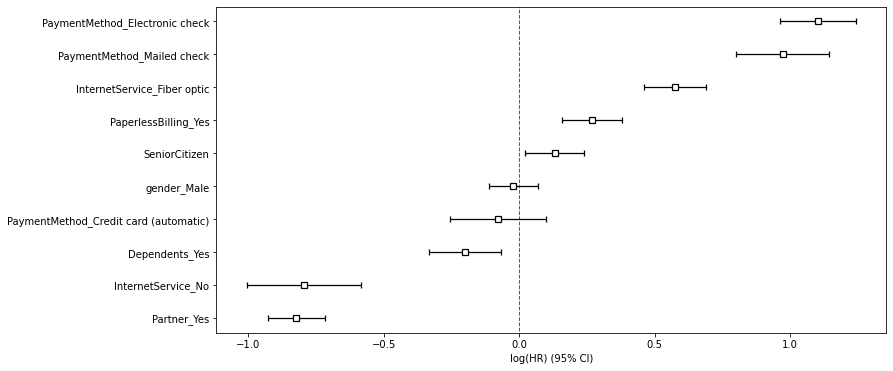

In [14]:
cph.plot()

The **hazard ratio** we get after taking the **exponent** of the **log(HR)** indicates the probability likelihood of an event to happen for a selected cohort group compared to the other cohort group. Hazard ratio of 1 means lack of association, a hazard ratio greater than 1 suggests an increased risk, and a hazard ratio below 1 suggests a smaller risk. 

Buckets that are on the right side of the middle line indicate cohort groups that are more likely to churn, and vice-versa. For example, we see that senior citizen cohort group is more likely to churn than non-senior citizen cohort group since SeniorCitizen bucket is on the right side of the line. Partner_Yes group is less likely to churn than Partner_No group since Partner_Yes bucket is on the left side of the line. 

## References

1. Lifelines: https://lifelines.readthedocs.io/en/latest/
2. Churn data: https://www.kaggle.com/blastchar/telco-customer-churn